[Посилання](https://www.tensorflow.org/tutorials/keras/classification?hl=ru)

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Завантаження набору даних Fashion MNIST з TensorFlow Keras datasets API.
fashion_mnist = tf.keras.datasets.fashion_mnist

# Розпакування набору даних на тренувальний та тестовий набори.
# train_images і train_labels - тренувальні зображення та мітки відповідно.
# test_images і test_labels - тестові зображення та мітки.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [46]:
# Визначення імен класів для набору даних Fashion MNIST. Кожен клас відповідає типу одягу.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [47]:
# Отримання розмірності масиву тренувальних зображень.
# Виводимо кількість зображень та їх розміри (висота та ширина в пікселях).

train_images.shape

(60000, 28, 28)

In [48]:
# Отримання кількості тренувальних міток, що відповідає кількості тренувальних зображень.

len(train_labels)

60000

In [49]:
# Виведення масиву тренувальних міток. Кожен елемент масиву є цілим числом,
# що представляє клас (тип одягу) відповідного зображення у тренувальному наборі даних.

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [50]:
# Отримання розмірності масиву тестових зображень, що вказує на кількість зображень у тестовому наборі
# та їх розміри (висота та ширина в пікселях).

test_images.shape

(10000, 28, 28)

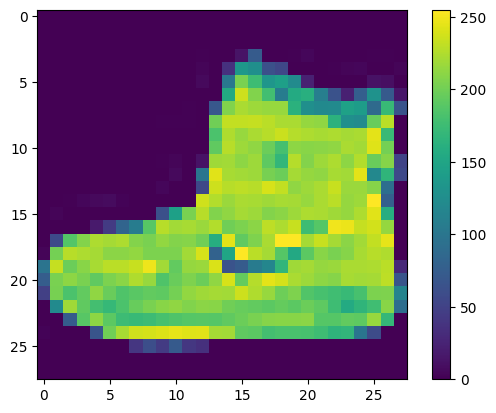

In [51]:
# Відображення першого зображення з тренувального набору даних.

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [52]:
# Нормалізація піксельних значень тренувальних та тестових зображень до діапазону [0, 1], ділимо на максимальне значення пікселя 255.

train_images = train_images / 255.0
test_images = test_images / 255.0

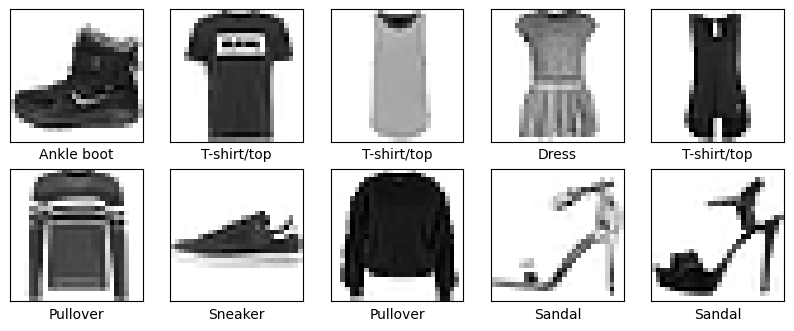

In [53]:
# Виводимо перші 25 зображень з тренувального набору.

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [54]:
# Створення послідовної моделі за допомогою Keras. Модель складається з 3-х шарів:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Перетворення вхідних зображень розміром 28x28 пікселів на одновимірний масив.
    tf.keras.layers.Dense(512, activation='relu'), # 1 шар з 512 нейронами і ReLU активацією.
    tf.keras.layers.Dropout(0.1), # Шар Dropout для запобігання перенавчанню, відкидає 10% нейронів.
    tf.keras.layers.Dense(256, activation='relu'), # 2 шар з 256 нейронами.
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'), # 3 шар з 128 нейронами.
    tf.keras.layers.Dense(10, activation='softmax')  # Вихідний шар з 10 нейронами для класифікації та Softmax активацією.
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 10)               

In [161]:
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#              metrics=['accuracy'])

In [55]:
# Введемо змінний навчальний коефіцієнт, який зменшуватиметься протягом тренування
# використовуємо оптимізатор SGD замість Adam

# Встановлення розкладу експоненційного зниження швидкості навчання для оптимізатора.
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, # Початкова швидкість навчання.
    decay_steps=10000, # Кількість кроків, після яких швидкість навчання буде зменшена.
    decay_rate=0.9) # Коефіцієнт зниження швидкості навчання.

# Створення оптимізатора SGD (стохастичний градієнтний спуск) з раніше визначеним розкладом
# швидкості навчання та додаванням імпульсу для покращення збіжності.
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

In [56]:
# Компіляція моделі із зазначенням оптимізатора, функції втрат та метрики для оцінки продуктивності.

model.compile(optimizer=optimizer, # Оптимізатор, який використовується для тренування (SGD з експоненційним зниженням швидкості навчання)
            loss='sparse_categorical_crossentropy', # Функція втрат, в нашому випадку оптимальна для мультикласової класифікації з цілочисельними мітками.
            metrics=['accuracy']) # Список метрик для моніторингу. Використовуємо точність (accuracy) як основну метрику.

In [57]:
# Створення зворотного виклику (callback) для ранньої зупинки тренування моделі, щоб запобігти перенавчанню.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Моніторинг втрати на валідаційному наборі даних.
    patience=10,        # Кількість епох без покращення після яких тренування буде зупинено
    restore_best_weights=True) # Відновлення ваг моделі з епохи, де було досягнуто найкращої валідаційної втрати.

In [64]:
# Тренування моделі на тренувальному наборі даних

model.fit(train_images, train_labels, # Тренувальні зображення та відповідні їм мітки
          epochs=20, # Максимальна кількість епох для тренування.
          batch_size=256, # Розмір пакету (кількість зразків за одне оновлення градієнта).
          callbacks=[early_stopping], # Застосування ранньої зупинки для запобігання перенавчанню.
          validation_split=0.2) # Частка даних, яка буде використовуватися як валідаційний набір.

Epoch 1/20
188/188 [==============================] - 3s 14ms/step - loss: 0.1764 - accuracy: 0.9349 - val_loss: 0.3041 - val_accuracy: 0.8981
Epoch 2/20
188/188 [==============================] - 3s 14ms/step - loss: 0.1755 - accuracy: 0.9348 - val_loss: 0.3163 - val_accuracy: 0.8941
Epoch 3/20
188/188 [==============================] - 3s 13ms/step - loss: 0.1750 - accuracy: 0.9350 - val_loss: 0.2949 - val_accuracy: 0.8955
Epoch 4/20
188/188 [==============================] - 3s 15ms/step - loss: 0.1673 - accuracy: 0.9381 - val_loss: 0.3065 - val_accuracy: 0.8932
Epoch 5/20
188/188 [==============================] - 3s 14ms/step - loss: 0.1631 - accuracy: 0.9397 - val_loss: 0.2863 - val_accuracy: 0.8998
Epoch 6/20
188/188 [==============================] - 3s 14ms/step - loss: 0.1623 - accuracy: 0.9404 - val_loss: 0.2891 - val_accuracy: 0.8985
Epoch 7/20
188/188 [==============================] - 3s 14ms/step - loss: 0.1586 - accuracy: 0.9416 - val_loss: 0.2976 - val_accuracy: 0.8994

In [63]:
# Оцінка моделі на тестовому наборі даних для визначення втрати та точності.

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3247 - accuracy: 0.8883 - 462ms/epoch - 1ms/step

Test accuracy: 0.8883000016212463


ВИСНОВКИ:

Модель показала точність класифікації на тестовому наборі даних — 88.83%

Основні аспекти, які сприяли досягненню цього результату:

- Архітектурно модель складається з 3-х шарів з
512, 256 та 128 нейронами відповідно. Активація ReLU була використана для нелінійності, а шар Softmax на виході дозволив класифікувати зображення у 10 категорій одягу.

- Регуляризація- були застосовані шари Dropout з коефіцієнтом 0.1 Це допомогло зменшити перенавчання, забезпечуючи більш стійку модель, що покращило результати на тестових даних.

- Оптимізатор - використання стохастичного градієнтного спуску (SGD) з експоненційним зниженням швидкості навчання та значенням імпульсу 0.9 показало кращі результати ніж з Adam.

- Використання ранньої зупинки у 10 епох і відновленням найкращих ваг показало, що модель зупиняється в оптимальний момент, мінімізуючи ризик перенавчання.